
## Data

Using the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## Project Scope

Using historical data, can we use TensorFlow and the Keras API to construct a classification model that predicts whether a borrower will pay back their loan. 

## Impact

If the model has high accuracy it can be used to predict whether a borrower will pay back their loan based on various features, helping to avoid giving out bad loans!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv('lending_club_info.csv',index_col = 'LoanStatNew')

In [3]:
data.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [4]:
def feat_info(col_name):
    '''
    print out the information(description) for a feature in the dataset
    '''
    print(data.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


### EXPLORATORY DATA ANALYSIS AND DATA CLEANING

In [6]:
df = pd.read_csv('lending_club_loan_two.csv')

In [7]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [9]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

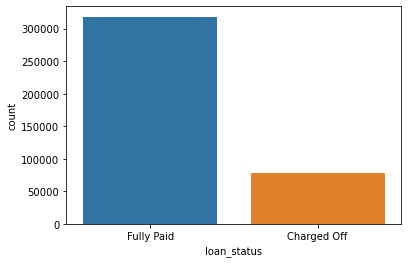

In [10]:
sns.countplot(x='loan_status',data=df)

In [11]:
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

In [12]:
def loan_stat_to_binary(loan):
    if loan == 'Fully Paid':
        return 1 
    else:
        return 0 

In [13]:
df['loan_status'] = df['loan_status'].apply(loan_stat_to_binary)

In [14]:
df.corr()['loan_status'].sort_values()

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
loan_status             1.000000
Name: loan_status, dtype: float64

### The largest correlations with loan status are seen in the interest rate and mort_acc features, followed by annual income. If we already have the annual income for an individual, their job title is irrelevant so it can be dropped from the dataset 

In [15]:
df = df.drop('emp_title',axis=1)

In [16]:
feat_info('pub_rec_bankruptcies')

Number of public record bankruptcies


In [17]:
df['pub_rec_bankruptcies'].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [18]:
df[df['pub_rec_bankruptcies'].isnull()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
912,5000.0,36 months,9.45,160.05,B,B1,3 years,RENT,40000.0,Not Verified,...,7.0,0.0,3212.0,35.7,18.0,f,INDIVIDUAL,NaN,NaN,Unit 7803 Box 8673\nDPO AA 22690
1236,9500.0,36 months,8.07,297.99,A,A4,2 years,OWN,90000.0,Not Verified,...,11.0,0.0,40384.0,9.6,25.0,f,INDIVIDUAL,NaN,NaN,"PSC 6601, Box 3923\nAPO AA 48052"
3314,900.0,36 months,8.63,28.47,A,A5,4 years,OWN,57000.0,Not Verified,...,2.0,0.0,167.0,3.3,4.0,f,INDIVIDUAL,NaN,NaN,"201 Diaz Garden\nSouth Peter, GA 00813"
3767,5000.0,36 months,7.43,155.38,A,A2,4 years,RENT,200000.0,Not Verified,...,2.0,0.0,3164.0,13.7,2.0,f,INDIVIDUAL,NaN,NaN,"062 Hunter Freeway Apt. 026\nNorth Laurenfort,..."
5821,4000.0,36 months,9.76,128.62,B,B2,< 1 year,RENT,63000.0,Not Verified,...,8.0,0.0,4010.0,8.1,17.0,f,INDIVIDUAL,NaN,NaN,"PSC 2418, Box 7919\nAPO AE 48052"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393931,18900.0,36 months,10.14,611.10,B,B4,1 year,MORTGAGE,44000.0,Not Verified,...,3.0,0.0,0.0,0.0,20.0,f,INDIVIDUAL,NaN,NaN,"8293 Henry Forges\nAngelamouth, LA 70466"
394290,8000.0,36 months,12.92,269.25,D,D2,10+ years,RENT,70000.0,Not Verified,...,19.0,0.0,1152.0,13.1,39.0,f,INDIVIDUAL,NaN,NaN,"82661 Moses Views Apt. 771\nKatieborough, KY 0..."
394292,2750.0,36 months,9.33,87.88,B,B3,4 years,MORTGAGE,112000.0,Not Verified,...,7.0,1.0,27786.0,85.5,16.0,f,INDIVIDUAL,NaN,NaN,"049 Sheri Neck Apt. 051\nMichaeltown, NC 30723"
395028,8000.0,36 months,12.17,266.37,D,D2,9 years,MORTGAGE,70000.0,Not Verified,...,15.0,0.0,26283.0,39.5,20.0,f,INDIVIDUAL,NaN,NaN,"6682 Ethan Center\nStephenston, AZ 93700"


<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

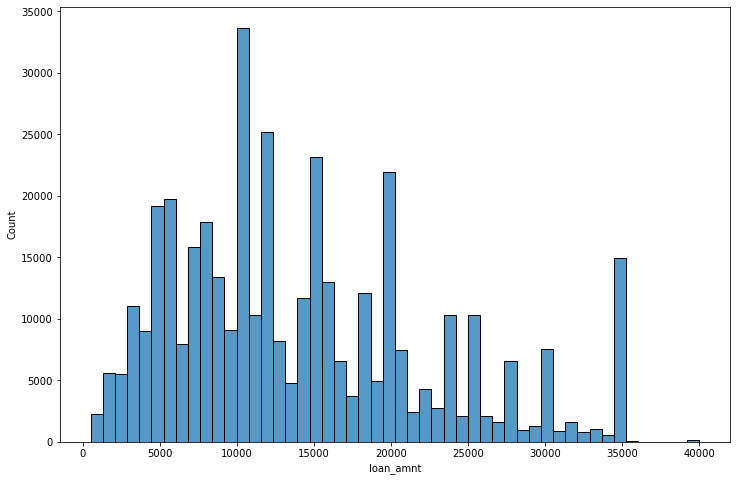

In [19]:
plt.figure(figsize=(12,8))
sns.histplot(x='loan_amnt',data=df,bins=50)


<AxesSubplot:>

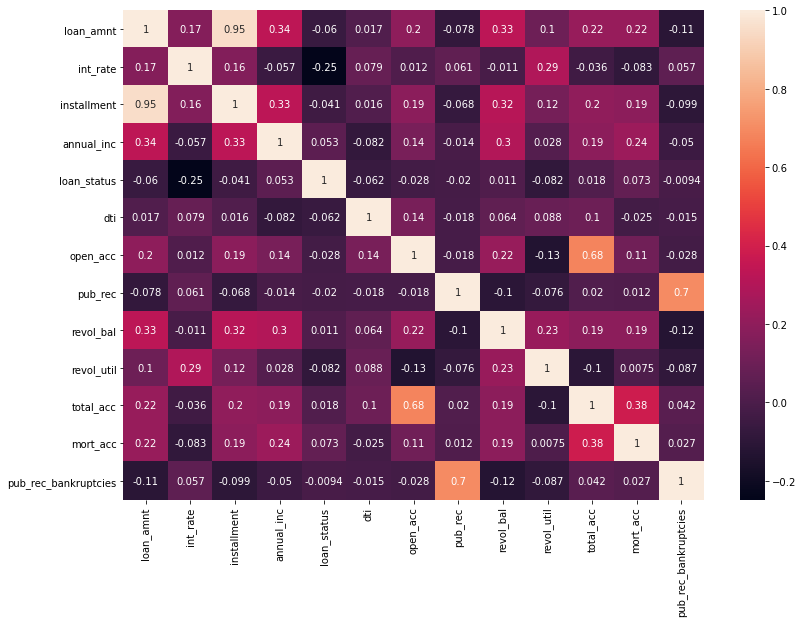

In [20]:
plt.figure(figsize=(13,9))
sns.heatmap(df.corr(),annot=True)

In [21]:
feat_info('installment')
feat_info('loan_amnt')

The monthly payment owed by the borrower if the loan originates.
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

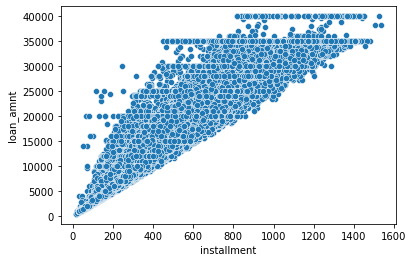

In [22]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

([<matplotlib.axis.XTick at 0x7fccbe8bc3a0>,
 [Text(0, 0, 'Charged Off'), Text(1, 0, 'Fully Paid')])

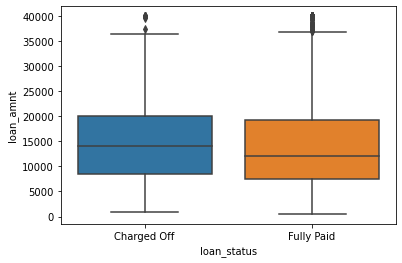

In [23]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
plt.xticks(ticks=[0,1],labels=['Charged Off','Fully Paid'])

In [24]:
#average loan amount for each category 

#first the charged off loans
charged_off_amnt_avg = np.mean(df[df['loan_status']==0]['loan_amnt'].values)

#fully paid loans
fully_paid_amnt_average = np.mean(df[df['loan_status']==1]['loan_amnt'].values)

print(charged_off_amnt_avg - fully_paid_amnt_average)

#on average charged off loan amounts are around $1250 more than those that
#were fully paid off 

1259.4221955574667


In [25]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
1,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [26]:
feat_info('grade')
feat_info('sub_grade')

LC assigned loan grade
LC assigned loan subgrade


In [27]:
np.sort(df['sub_grade'].unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [28]:
np.sort(df['grade'].unique())

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [29]:
def loan_stat_to_cat(loan):
    if loan == 1:
        return 'Fully Paid' 
    else:
        return 'Charged Off'

In [30]:
df['loan_status_cat'] = df['loan_status'].apply(loan_stat_to_cat)

<AxesSubplot:xlabel='grade', ylabel='count'>

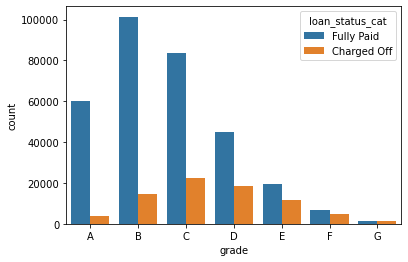

In [31]:
sns.countplot(x='grade',data=df.sort_values('grade'),hue='loan_status_cat')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

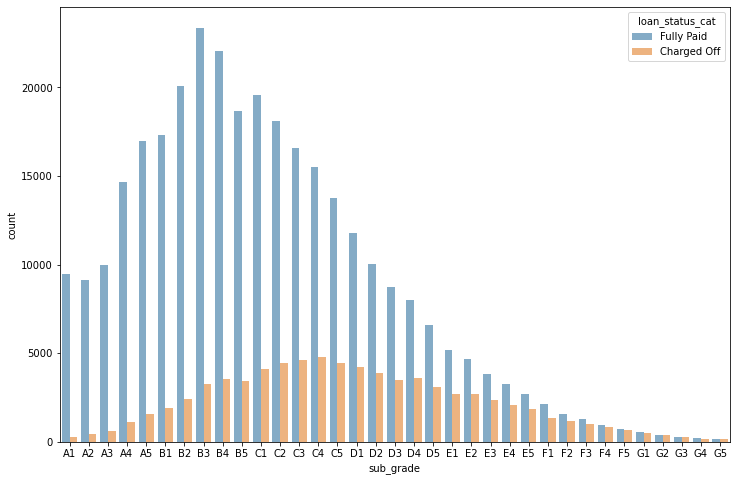

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(x='sub_grade',data=df.sort_values('sub_grade'),
              hue='loan_status_cat',alpha=0.6)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

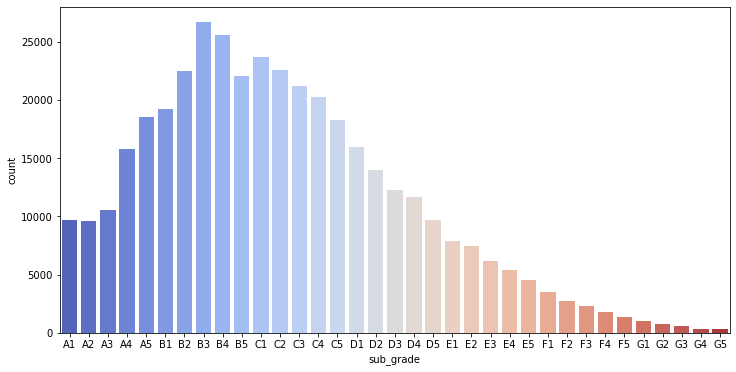

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=df.sort_values('sub_grade'),
             palette='coolwarm')

In [34]:
sub_F_to_G = df[df['sub_grade'].isin(['F1','F2','F3','F4','F5',
                                     'G1','G2','G3','G4','G5'])]

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

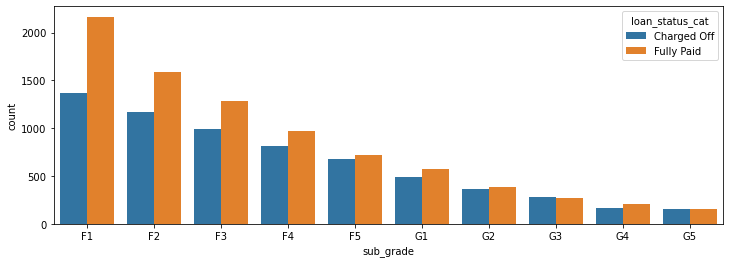

In [35]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=sub_F_to_G.sort_values('sub_grade'),
             hue='loan_status_cat')

(-0.25, 0.1)

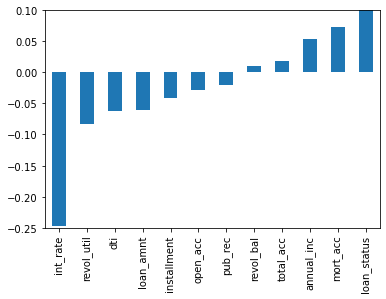

In [36]:
df.corr()['loan_status'][:-1].sort_values().plot(kind='bar')
plt.ylim([-0.25,0.1])

DATA PREPROCESSING

In [37]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_status_cat         0.000000
dtype: float64

<AxesSubplot:xlabel='emp_length', ylabel='count'>

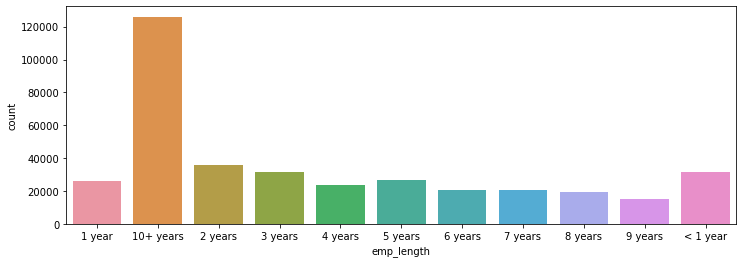

In [38]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df.sort_values('emp_length'))

<AxesSubplot:xlabel='emp_length', ylabel='count'>

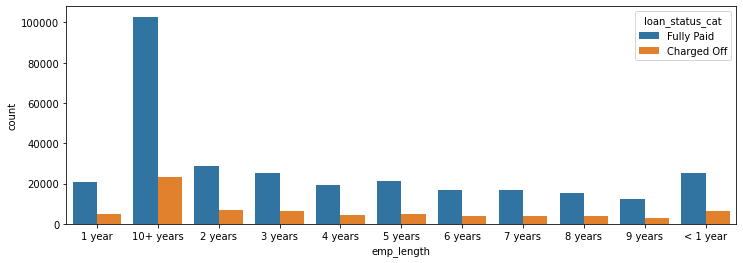

In [39]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df.sort_values('emp_length'),
             hue='loan_status_cat')

In [40]:
charge_off_emplen_df = df[df['loan_status_cat']=='Charged Off']['emp_length']
charge_off_emplen_df = charge_off_emplen_df[charge_off_emplen_df.isnull()==False]

full_paid_emplen_df = df[df['loan_status_cat']=='Fully Paid']['emp_length']
full_paid_emplen_df = full_paid_emplen_df[full_paid_emplen_df.isnull() == False]

In [41]:
charge_off_emplen_df.value_counts()

10+ years    23215
2 years       6924
< 1 year      6563
3 years       6182
1 year        5154
5 years       5092
4 years       4608
7 years       4055
6 years       3943
8 years       3829
9 years       3070
Name: emp_length, dtype: int64

In [42]:
full_paid_emplen_df.value_counts()

10+ years    102826
2 years       28903
3 years       25483
< 1 year      25162
5 years       21403
1 year        20728
4 years       19344
6 years       16898
7 years       16764
8 years       15339
9 years       12244
Name: emp_length, dtype: int64

In [43]:
charge_off_emplen = np.array([6563,5154,6924,6182,4608,5092,3943,4055,3829,3070,23215])

full_paid_emplen = np.array([25162,20728,28903,25483,19344,21403,16898,16764,15339,12244,102826])

In [44]:
total_emplen = charge_off_emplen + full_paid_emplen

In [45]:
total_emplen

array([ 31725,  25882,  35827,  31665,  23952,  26495,  20841,  20819,
        19168,  15314, 126041])

In [46]:
charge_off_emplen / total_emplen

array([0.20687155, 0.19913453, 0.19326206, 0.19523133, 0.19238477,
       0.19218721, 0.18919438, 0.194774  , 0.19976002, 0.20047016,
       0.1841861 ])

In [47]:
d = {'< 1 year':0.20687155,'1 year':0.19913453,'2 years':0.19326206,'3 years':0.19523133,
    '4 years':0.19238477,'5 years':0.19218721,'6 years':0.18919438,'7 years':0.194774,
    '8 years':0.19976002,'9 years':0.20047016,'10+ years':0.1841861}

In [48]:
s = pd.Series(d)
s1 = s.index
s2 = s.values
print(s1)
print(s2)

Index(['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '10+ years'],
      dtype='object')
[0.20687155 0.19913453 0.19326206 0.19523133 0.19238477 0.19218721
 0.18919438 0.194774   0.19976002 0.20047016 0.1841861 ]


In [49]:
s = pd.DataFrame(pd.Series(d),columns=['percentage of total'])
s.head()

,percentage of total
< 1 year,0.206872
1 year,0.199135
2 years,0.193262
3 years,0.195231
4 years,0.192385


<Figure size 1008x288 with 0 Axes>

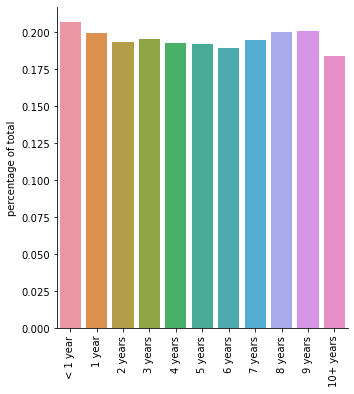

In [50]:
plt.figure(figsize=(14,4))
ax = sns.catplot(x=s.index,y=s['percentage of total'],kind='bar',data=s)
ax.set_xticklabels(rotation=90)

In [51]:
df = df.drop('emp_length',axis=1)

In [52]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_status_cat             0
dtype: int64

In [53]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [54]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [55]:
df = df.drop('title',axis=1)

These columns hold the same information so one can be dropped from the data table

In [56]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_status_cat             0
dtype: int64

In [57]:
feat_info('mort_acc')

Number of mortgage accounts.


In [58]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

In [59]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_status             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [60]:
tot_acc_avg = df.groupby('total_acc')['mort_acc'].mean()

In [61]:
tot_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [62]:
def fill_mort_acc(total_acc,mort_acc):
    
    if np.isnan(mort_acc):
        return tot_acc_avg[total_acc]
    else:
        return mort_acc

In [63]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(
x['total_acc'], x['mort_acc']),axis=1)

In [64]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_status_cat           0
dtype: int64

In [65]:
df = df.dropna()

In [66]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_status_cat         0
dtype: int64

In [67]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status_cat
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",Fully Paid
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",Fully Paid
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",Fully Paid
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",Fully Paid
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",Charged Off


In [68]:
df = df.drop('loan_status_cat',axis=1)

In [69]:
df.dtypes=='object'

loan_amnt               False
term                     True
int_rate                False
installment             False
grade                    True
sub_grade                True
home_ownership           True
annual_inc              False
verification_status      True
issue_d                  True
loan_status             False
purpose                  True
dti                     False
earliest_cr_line         True
open_acc                False
pub_rec                 False
revol_bal               False
revol_util              False
total_acc               False
initial_list_status      True
application_type         True
mort_acc                False
pub_rec_bankruptcies    False
address                  True
dtype: bool

In [70]:
df['term'][0][1]

'3'

In [71]:
def term_to_int(term):
    
    if term[1] == '3':
        return 36
    else:
        return 60

In [72]:
df['term'] = df['term'].apply(term_to_int)

In [73]:
df['term'].dtype

dtype('int64')

In [74]:
df = df.drop('grade',axis=1)

Creating dummy variables for categorical data 

In [75]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [76]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [77]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [78]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [79]:
dummies = pd.get_dummies(df[['verification_status','application_type',
                            'initial_list_status','purpose']],
                        drop_first=True)

In [80]:
df = df.drop(['verification_status','application_type',
              'initial_list_status','purpose'],axis=1)

In [81]:
df = pd.concat([df,dummies],axis=1)

Home ownership 

In [82]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [83]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [84]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [85]:
home_dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

In [86]:
df = pd.concat([df.drop('home_ownership',axis=1),home_dummies],axis=1)

In [87]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'],
 

In [88]:
df['address'][0][-5:]

'22690'

In [89]:
df['zip_code'] = df['address'].apply(lambda x: x[-5:])

In [90]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [91]:
df['address'][3][-5:]

'00813'

In [92]:
zip_dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,zip_dummies],axis=1)

Drop issue_d. Would be data leakage since we wouldn't know beforehand whether or not a loan would be issued when using the model. 

In [93]:
df = df.drop('issue_d',axis=1)

In [94]:
df['earliest_cr_line'].head()[0][-4:]

'1990'

In [95]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [96]:
for year in df['earliest_cr_year']:
    
    if len(str(year))== 4: 
        pass
    else:
        print('FAIL')

In [97]:
df['earliest_cr_year'].dtype

dtype('int64')

In [98]:
df = df.drop('earliest_cr_line',axis=1)

TRAINING THE MODEL 

In [99]:
from sklearn.model_selection import train_test_split

In [101]:
X = df.drop('loan_status',axis=1).values
y = df['loan_status'].values

In [101]:
#df = df.sample(frac=0.1,random_state=101)

In [104]:
df.shape

(395219, 79)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=101)

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
scaler = MinMaxScaler()

In [108]:
X_train = scaler.fit_transform(X_train)

In [109]:
X_test = scaler.transform(X_test)

Creating the Model

In [110]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [111]:
model = Sequential()

#input layer
model.add(Dense(79, activation='relu'))
model.add(Dropout(0.2))

#hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

#hidden layer 
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

#output layer
model.add(Dense(units=1,activation='sigmoid'))

#Compile model
model.compile(loss='binary_crossentropy', optimizer = 'adam')

In [112]:
model.fit(x=X_train,y=y_train,epochs=25,
         batch_size=256,
         validation_data=(X_test,y_test),)

Epoch 1/25
1236/1236 [==============================] - 5s 3ms/step - loss: 0.2979 - val_loss: 0.2653
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2658 - val_loss: 0.2631
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2630 - val_loss: 0.2626
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2618 - val_loss: 0.2620
Epoch 5/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2611 - val_loss: 0.2622
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2602 - val_loss: 0.2629
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2601 - val_loss: 0.2617
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2597 - val_loss: 0.2615
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2595 - val_loss: 0.2616
Epoch 10/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.259

SAVE MODEL 

In [113]:
from tensorflow.keras.models import load_model 

In [114]:
model.save('loan_data_prediction_model.h5')

Evaluate the Model's Performance

In [116]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

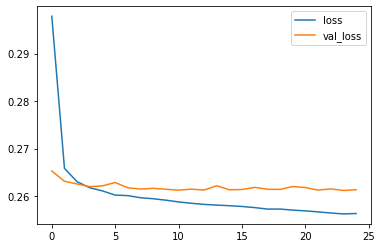

In [117]:
losses.plot()

In [118]:
from sklearn.metrics import classification_report, confusion_matrix

In [119]:
predictions = (model.predict(X_test)>0.5).astype('int32')

In [120]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [121]:
confusion_matrix(y_test,predictions)

array([[ 7005,  8653],
       [  213, 63173]])

In [122]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_status',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [123]:
model.predict(new_customer.values.reshape(1,78))

array([[1.]], dtype=float32)

In [124]:
df.iloc[random_ind]['loan_status'] #correct! 

1.0

### The model achieved good performance with 89% accuracy and high precision in predicting loan outcomes based on the dataset